# Regression analysis on price of electric vehicles.

# Importing of libraries for data cleaning and visualization

In [188]:
# Import NumPy for numerical computing
import numpy as np

# Import Pandas for data manipulation and analysis
import pandas as pd

# Import Matplotlib for creating static, interactive, and animated visualizations in Python
import matplotlib.pyplot as plt

# Import Seaborn for statistical data visualization based on Matplotlib
import seaborn as sns

 # Import matplotlib library for plotting
import matplotlib.pyplot as plt  # Import matplotlib library for plottin

# Importing the dataset

In [189]:
df = pd.read_csv(r"C:\Users\Shoaib shaikh\Desktop\archive\EV.csv")

# Performing data cleaning

In [190]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [191]:
df.describe() #Describes numerical features

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [192]:
df.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

In [221]:
df.isnull().sum() #Checking if there are any wrong data types - The one found here is FastCharge_KmH which should be a int datatype

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [194]:
print(df['FastCharge_KmH'].unique()) #there is a error value in FastCharge which can create problems ahead.

['940' '250' '620' '560' '190' '220' '420' '650' '540' '440' '230' '380'
 '210' '590' '780' '170' '260' '930' '850' '910' '490' '470' '270' '450'
 '350' '710' '240' '390' '570' '610' '340' '730' '920' '-' '550' '900'
 '520' '430' '890' '410' '770' '460' '360' '810' '480' '290' '330' '740'
 '510' '320' '500']


In [222]:
#Replacing the error value with nan first and then taking the mean of FastCharge to place it instead of NAN
df['FastCharge_KmH'] = df['FastCharge_KmH'].replace('-', np.nan)
df['FastCharge_KmH'] = pd.to_numeric(df['FastCharge_KmH'])
median_fast_charge = df['FastCharge_KmH'].mean(skipna=True)
df['FastCharge_KmH'].fillna(median_fast_charge, inplace=True)
print(df['FastCharge_KmH'].unique())

[940.         250.         620.         560.         190.
 220.         420.         650.         540.         440.
 230.         380.         210.         590.         780.
 170.         260.         930.         850.         910.
 490.         470.         270.         450.         350.
 710.         240.         390.         570.         610.
 340.         730.         920.         456.73469388 550.
 900.         520.         430.         890.         410.
 770.         460.         360.         810.         480.
 290.         330.         740.         510.         320.
 500.        ]


# Performing data visualization for better understanding

In [223]:
numerical_variables = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'PriceEuro']

# Univariate analysis

Univariate Analysis


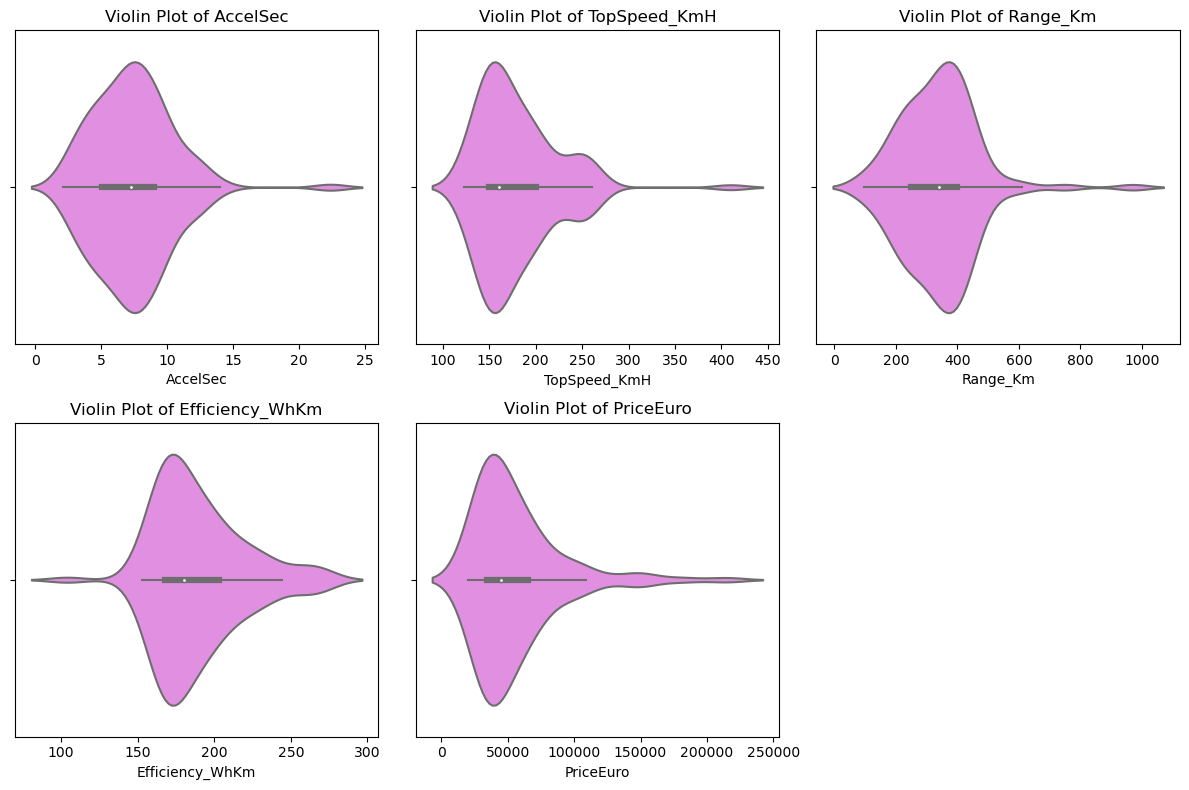

In [197]:
print('Univariate Analysis')
plt.figure(figsize=(12, 8))
for i, var in enumerate(numerical_variables, start=1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=df[var], color='violet')
    plt.title(f'Violin Plot of {var}')
    plt.xlabel(var)
plt.tight_layout()
plt.show()

# Bivariate analysis

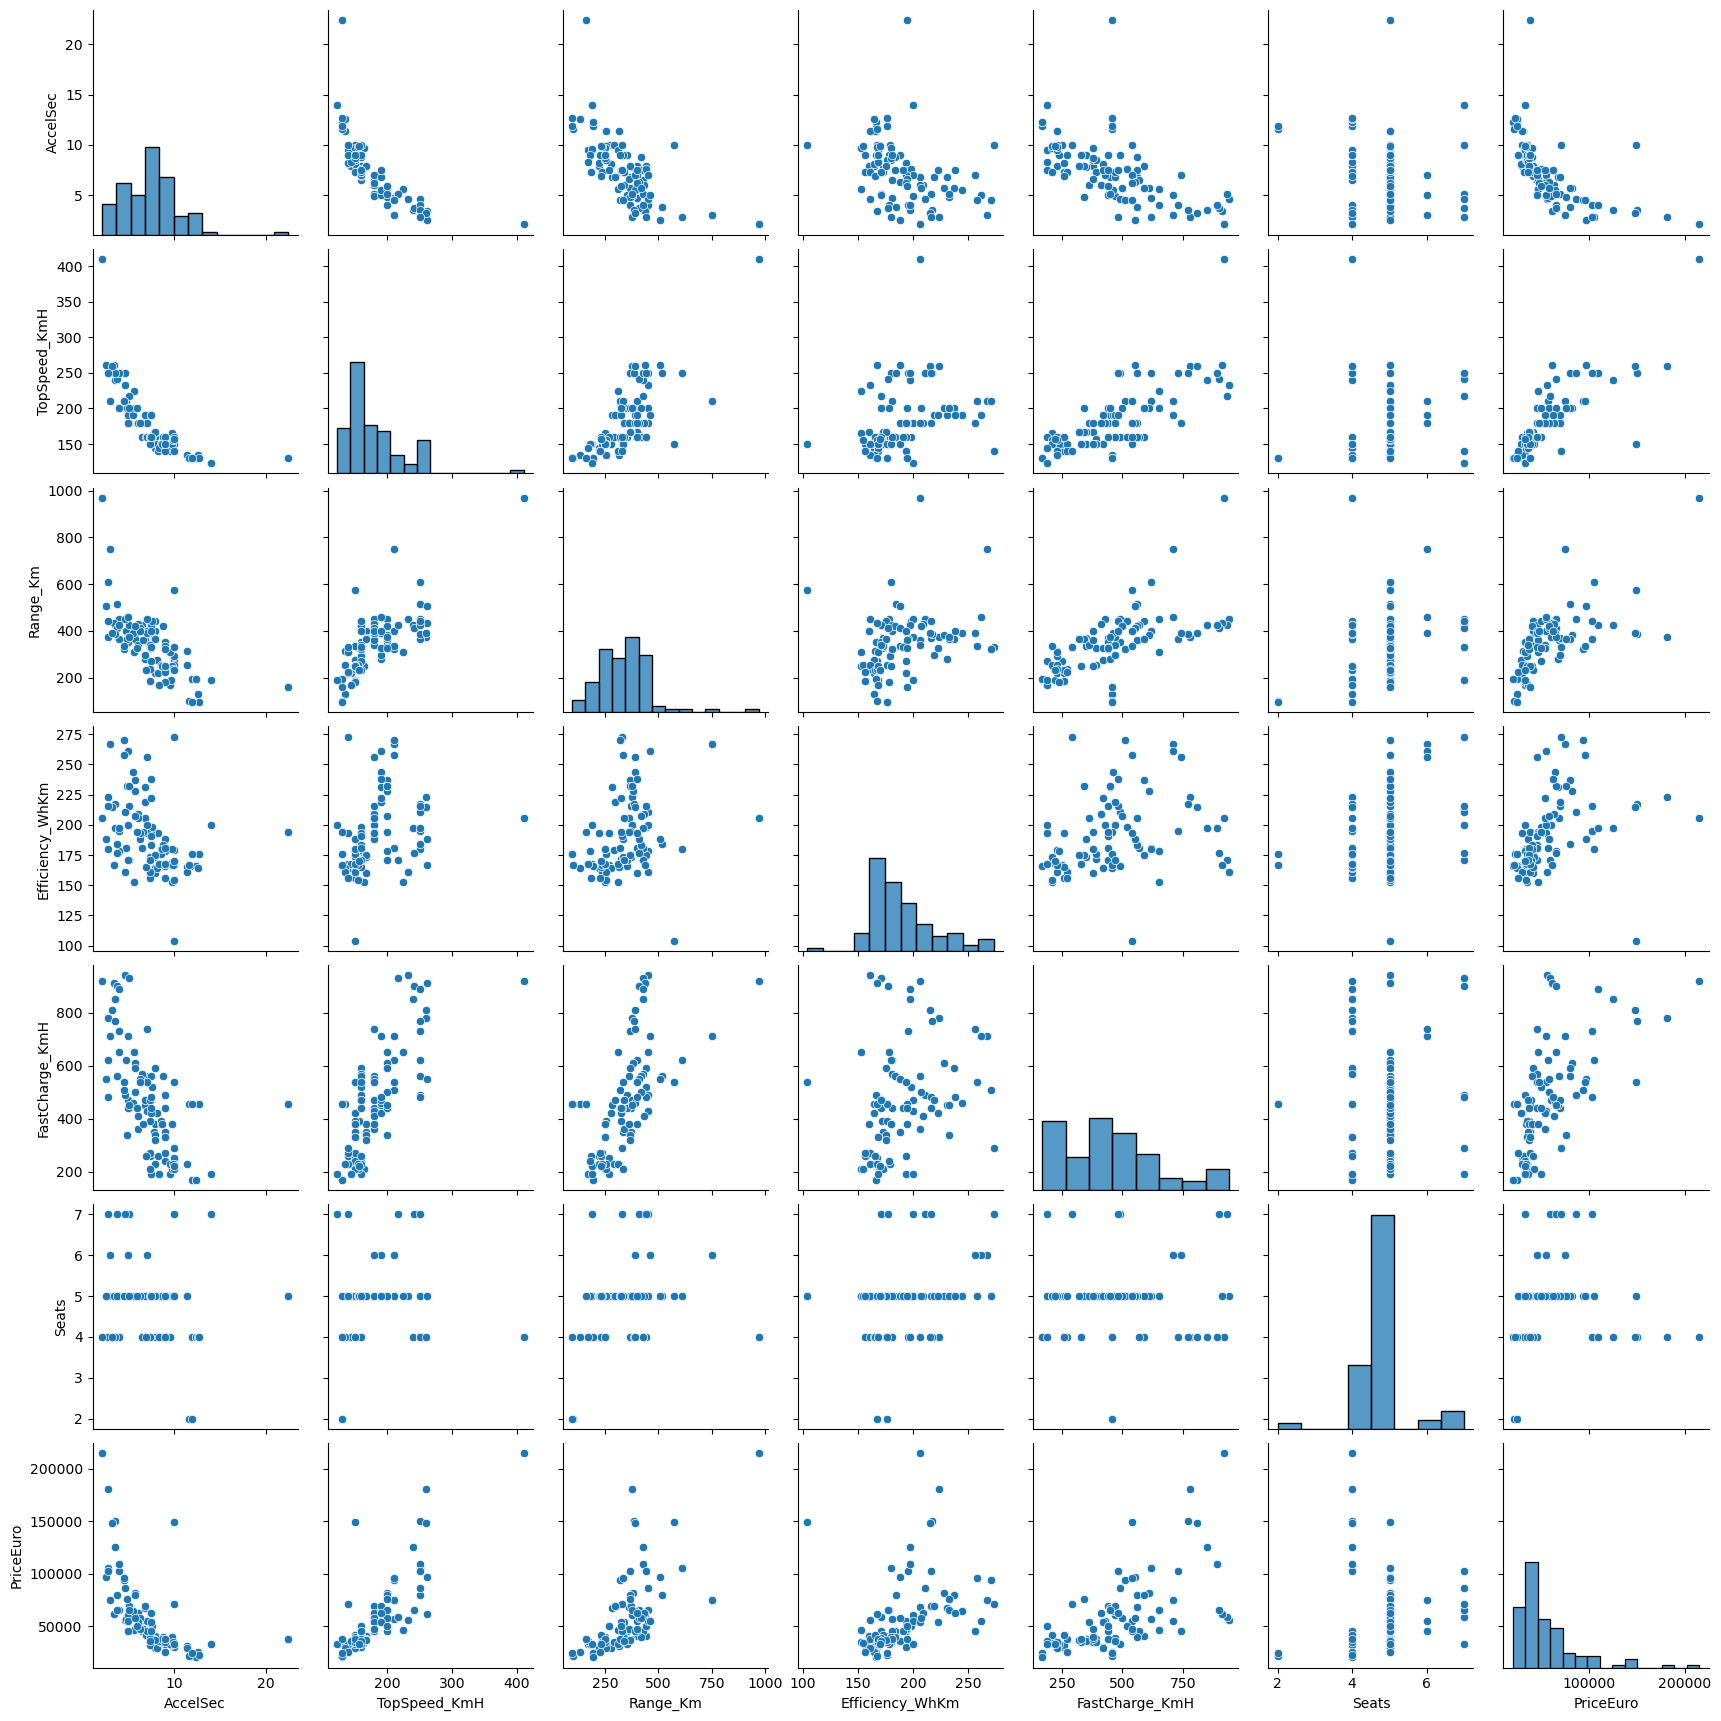

In [199]:
nc_df = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(nc_df)
plt.show()

# Multivariate analysis

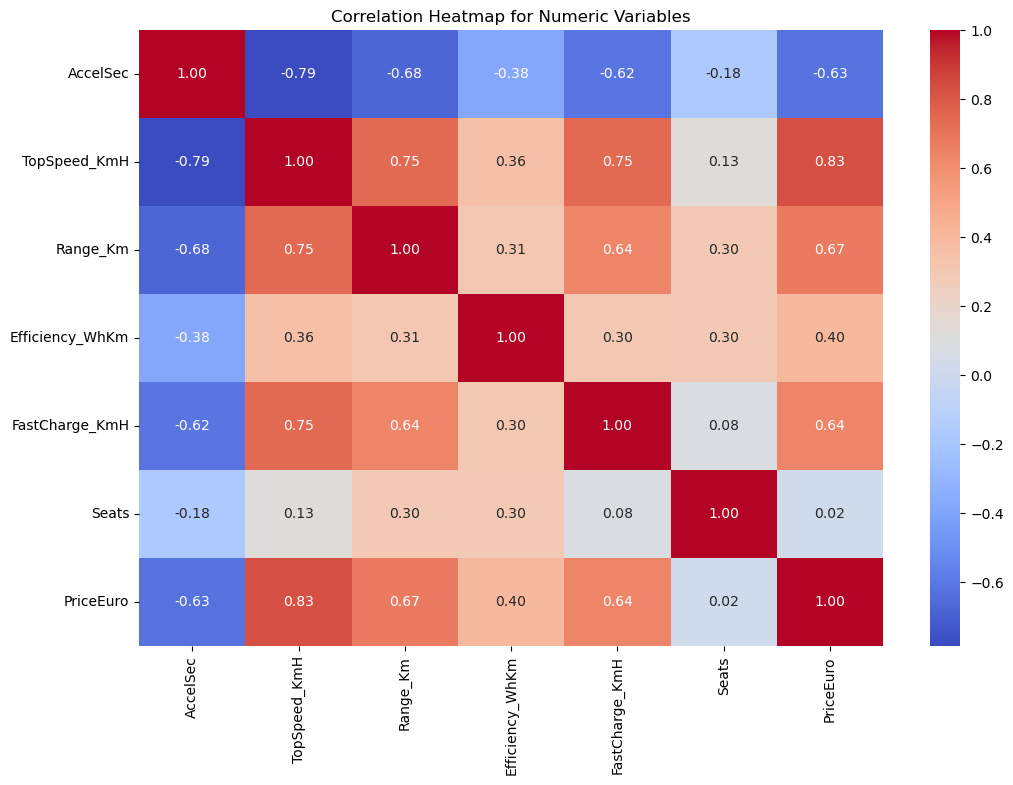

In [200]:
corr_matrix = nc_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()

# Model building

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import statsmodels.api as sm

In [202]:
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['PriceEuro'])
y = df['PriceEuro']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [204]:
lr = LinearRegression()

In [205]:
lr.fit(X_train, y_train)

LinearRegression()

In [206]:
y_pred = lr.predict(X_test)

In [207]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R-squared (R2) score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2) score: 0.6274534597924876
Mean Squared Error (MSE): 295443431.56559235
Mean Absolute Error (MAE): 13607.824120869764
Root Mean Squared Error (RMSE): 17188.467981923008


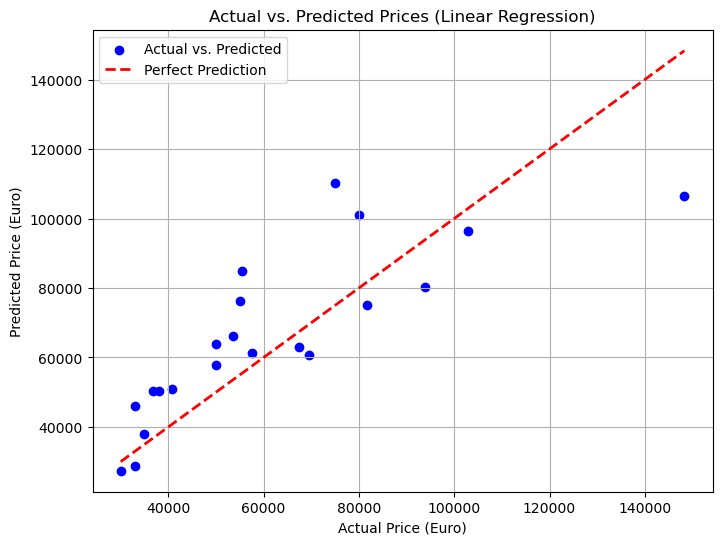

In [208]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Prices (Linear Regression)')
plt.xlabel('Actual Price (Euro)')
plt.ylabel('Predicted Price (Euro)')
plt.legend()
plt.grid(True)
plt.show()

# Ridge regression

In [209]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [210]:
alpha = 1.0  # Regularization strength, you can adjust this parameter
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [211]:
y_pred = ridge_model.predict(X_test_scaled)

In [212]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) score:", r2)

Mean Absolute Error (MAE): 13720.462086148596
Mean Squared Error (MSE): 301007241.7875821
Root Mean Squared Error (RMSE): 17349.560276490643
R-squared (R2) score: 0.6204376387346642


# Random forest regression

In [213]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) as needed
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [214]:
y_pred_rf = rf_model.predict(X_test)

In [215]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print("Mean Squared Error (MSE) - Random Forest:", mse_rf)
print("Mean Absolute Error (MAE) - Random Forest:", mae_rf)
print("Root Mean Squared Error (RMSE) - Random Forest:", rmse_rf)
print("R-squared (R2) score - Random Forest:", r2_rf)

Mean Squared Error (MSE) - Random Forest: 136567241.32554406
Mean Absolute Error (MAE) - Random Forest: 7538.2773015873
Root Mean Squared Error (RMSE) - Random Forest: 11686.198754323155
R-squared (R2) score - Random Forest: 0.8277922342293795


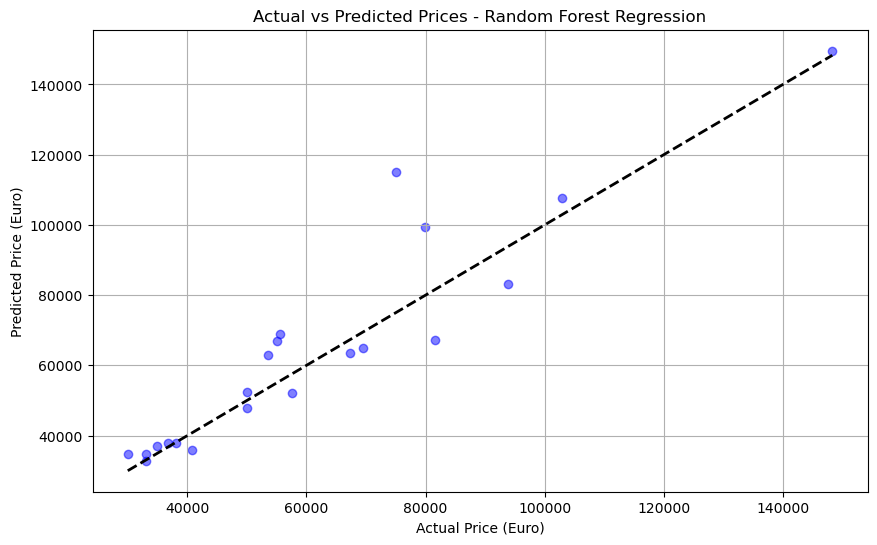

In [216]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price (Euro)')
plt.ylabel('Predicted Price (Euro)')
plt.title('Actual vs Predicted Prices - Random Forest Regression')
plt.grid(True)
plt.show()

# Support vector regression

In [217]:
svr_model = SVR(kernel='linear')  # You can adjust the kernel and other parameters as needed
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [218]:
y_pred_svr = svr_model.predict(X_test)

In [219]:
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)
print("Mean Squared Error (MSE) :", mse_svr)
print("Mean Absolute Error (MAE) :", mae_svr)
print("Root Mean Squared Error (RMSE) :", rmse_svr)
print("R-squared (R2) score :", r2_svr)

Mean Squared Error (MSE) : 294466906.0823504
Mean Absolute Error (MAE) : 11082.809669322116
Root Mean Squared Error (RMSE) : 17160.03805597034
R-squared (R2) score : 0.6286848332174388


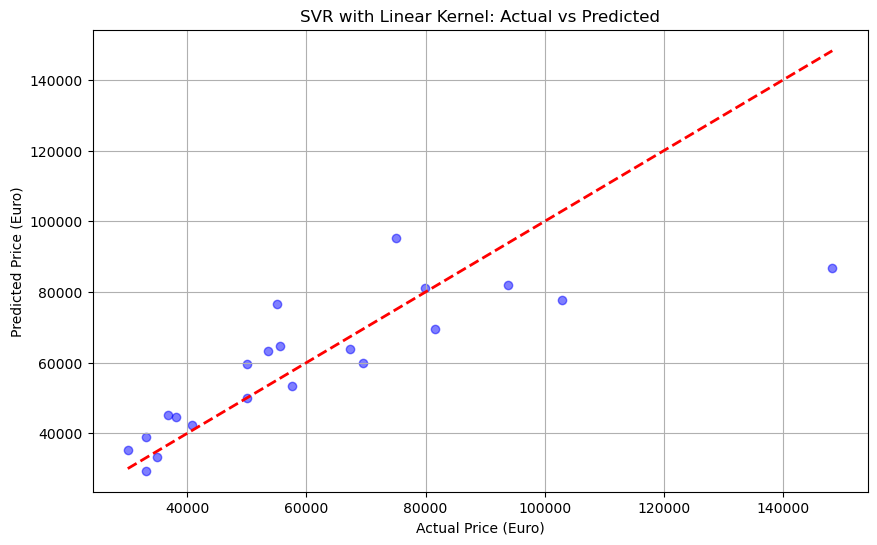

In [220]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('SVR with Linear Kernel: Actual vs Predicted')
plt.xlabel('Actual Price (Euro)')
plt.ylabel('Predicted Price (Euro)')
plt.grid(True)
plt.show()

# Comparing the values of R-squared(R²) from the models used.
<h2>According to the values of R² obtained, the model which is Best Fit for this regression problem is: Random Forest Regression</h2>

<h3>Model Performance Rankings:</h3>
<ul>
    <ul>Random Forest Regression: R-squared (R<sup>2</sup>) score - 0.8278</ul>
    <ul>SVR Regression: R-squared (R<sup>2</sup>) score - 0.6287</ul>
    <ul>Linear Regression: R-squared (R<sup>2</sup>) score - 0.6275</ul>
    <ul>Ridge Regression: R-squared (R<sup>2</sup>) score - 0.6204</ul>
</ul>